# <b>Loan Approval Prediction Using Machine Learning<b>

The objective of this project is to predict whether a loan would be a risk to the bank or not. When a customer applies for a loan, bank executives must decide whether to approve or reject the application. This decision is based on verifying the customer's background, analyzing the provided information, and identifying whether the customer will repay the loan or default. Since banks process many loan applications every day, a predictive model can help executives make quicker and better decisions.

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Reading the data 
The file Loan_Approval_Data.csv contains historical data on approved and rejected loan applications. The goal is to learn from this data and predict whether a new loan application will be approved or rejected.

In [2]:
import pandas as pd
import numpy as np

# Reading the dataset
df=pd.read_csv("Loan_Approval_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Removing Removing duplicate rows if any**

In [3]:
print("Shape of the data before deleting duplicate values: ", df.shape)

# Removing duplicate rows if any
df=df.drop_duplicates()
print("Shape of the data after deleting duplicate values: ", df.shape)

Shape of the data before deleting duplicate values:  (614, 13)
Shape of the data after deleting duplicate values:  (614, 13)


* There are no duplicate values present in the dataset

## Defining the problem statement

__To create a predictive model that can determine whether to approve a loan application or not.__

**Target Variable:** Loan_Status
- Loan_Status="N" means the loan was rejected.
- Loan_Status="Y" means the loan was approved.

**Predictors:** Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.



**Determining the type of Machine Learning:** Since the goal is to predict whether to approve a loan application or not, this makes it a binary classification problem. Therefore, a supervised machine learning classification model is needed.


## Looking at the distribution of Target variable
In a classification problem, having a balanced distribution of classes is desirable, otherwise it can affect the machine learning algorithm's ability to learn all classes effectively. When one class has significantly more instances than the others, the model struggles to learn patterns for the minority class. This results in biased predictions favoring the majority class, leading to misleading accuracy and poor generalization. To improve model performance and ensure fair predictions, it is important to address class imbalance using appropriate techniques.

<Axes: xlabel='Loan_Status'>

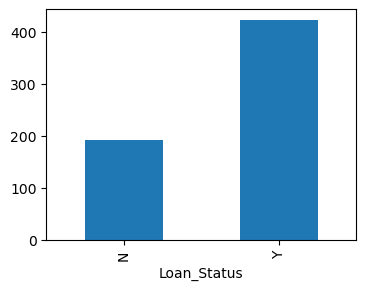

In [4]:
%matplotlib inline

# Creating Bar chart as the Target variable is Categorical
groupdata=df.groupby('Loan_Status').size()
groupdata.plot(kind='bar',figsize=(4,3))

- The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

## Basic Data Exploration
This step helps to understand the overall data, including its size and column types (Quantitative, Categorical, or Qualitative). It helps in identifying irrelevant columns by evaluating their impact on the target variable. If a column does not influence loan approval or rejection, it should be removed; otherwise, it is retained for further analysis.

In [5]:
# Looking at sample rows in the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Observing the summarized information of data, like:
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [7]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
# Finging unique values for each column tO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
# Finding how many missing values are there for each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Basic Data Exploration Results**

Based on the basic data exploration, create a simple report summarizing the data and noting observations for each column.
- **Loan_ID:** Qualitative | Rejected | This column does not affect the loan approval or rejection.
- **Gender:** Categorical | Selected | Missing value treatment required.
- **Married:** Categorical | Selected | Missing value treatment required.
- **Dependents:** Categorical | Selected | Missing value treatment required.
- **Education:** Categorical | Selected
- **Self_Employed:** Categorical | Selected
- **ApplicantIncome:** Quantitative | Selected | Missing value treatment required.
- **CoapplicantIncome:** Quantitative | Selected
- **LoanAmount:** Quantitative | Selected | Missing value treatment required.
- **Loan_Amount_Term:** Categorical | Selected | Missing value treatment required.
- **Credit_History:** Categorical | Selected | Missing value treatment required.
- **Property_Area:** Categorical | Selected
- **Loan_Status:** Categorical | Selected | This is the **Target Variable**

The selected columns at this stage are not final, further analysis will be conducted before creating the final list.


## Removing useless variables from data
Based on the above report, removing "Loan_ID" column from the data

In [10]:
# Removing "Loan_ID" column from the data
LoanData=df.drop('Loan_ID', axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Visual Exploratory Data Analysis
- Categorical variables: Bar plot
- Continuous variables: Histogram

**Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

Based on the basic data exploration, the data contains eight categorical predictors: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'

Bar charts are used to visualize the distribution of data for categorical predictors.

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since no default function exists to plot bar charts for multiple columns at once, a custom function is being defined for this purpose
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


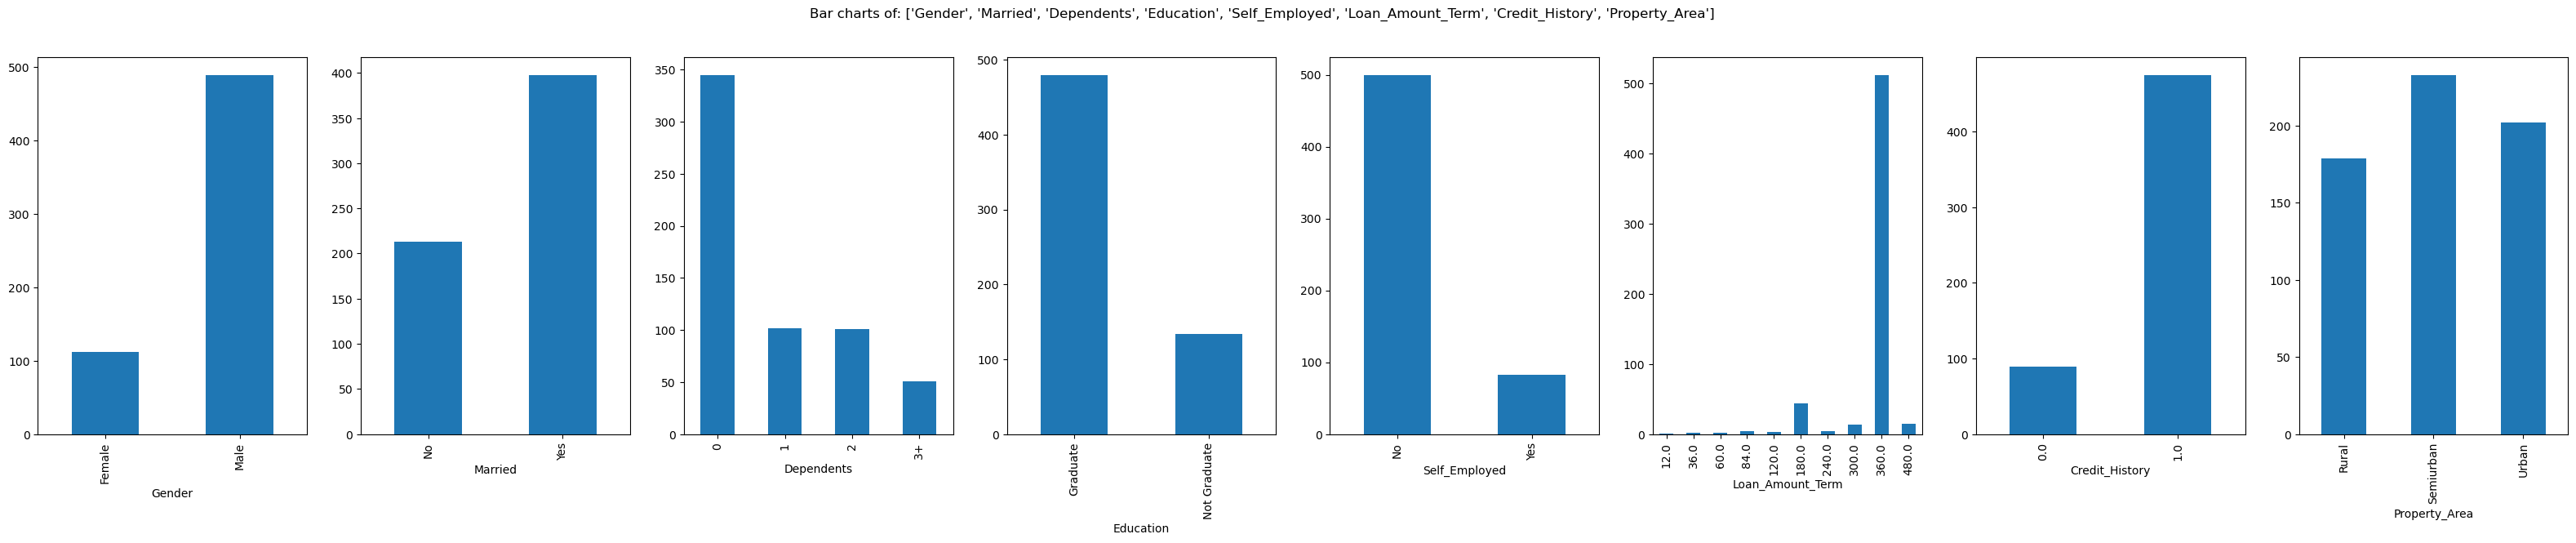

In [12]:
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

**Bar Charts Interpretation**

These bar charts show the frequencies of each category on the Y-axis and the category names on the X-axis.

An ideal bar chart, like that of the 'Property_Area' column, has comparable frequencies across categories, ensuring enough data for the ML algorithm to learn.

However, if a column has a highly skewed distribution, like 'Loan_Amount_Term,' where one category dominates while others have very few instances, it may not be very useful for machine learning. This is further evaluated in the correlation analysis section, where a final decision is made on whether to keep or remove the column.

In this dataset, all categorical columns except 'Loan_Amount_Term' have a satisfactory distribution for machine learning.

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the basic data exploration, the data contains three continuous predictor: 'ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount'.

Histograms are used to visualize the distribution of continuous predictor.

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>, <Axes: >]], dtype=object)

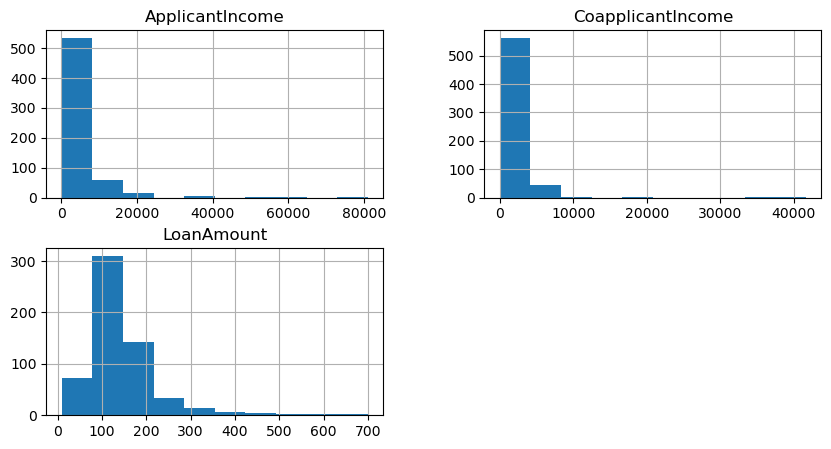

In [13]:
# Plotting histograms of multiple columns together
LoanData.hist(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], figsize=(10,5))

**Histogram Interpretation**

Histograms show the data distribution for each continuous variable. The X-axis represents the range of values, while the Y-axis shows the frequency of values within that range. The ideal histogram outcome is a bell curve or a slightly skewed bell curve. If there is excessive skewness, outlier treatment should be applied, and the column should be re-examined. If the issue persists, the column may be considered for removal.

**Selected Continuous Variables:**
- **ApplicantIncome:** Outliers seen beyond 30000, need to treat them.
- **CoapplicantIncome:** Outliers seen beyond 15000, need to treat them.
- **LoanAmount:** Slightly skewed distribution, acceptable.

## Outlier treatment
Outliers are extreme values that deviate significantly from most of the data. They can be identified by examining the tails of a histogram. Outliers can bias the training of machine learning models, as the algorithm may attempt to fit these extreme values, deviating from the majority of the data.

Outliers should be treated one column at a time, as the appropriate treatment may vary for each column. Outlier values are imputed with a logical business value, determined through histogram analysis.

<b>Replacing outliers for 'ApplicantIncome'<b>

In [14]:
# From histogram outliers are seen beyond 30000, need to treat them.
# Finding nearest values to 30000 mark
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

In [15]:
# Above result shows the nearest logical value is 23803, hence, replacing any value above 30000 with it.
# Replacing outliers with nearest possibe value
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000]=23803

<b>Replacing outliers for 'CoapplicantIncome'<b>

In [16]:
# Finding nearest values to 15000 mark
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

In [17]:
# Above result shows the nearest logical value is 11300, hence, replacing any value above 15000 with it.
# Replacing outliers with nearest possibe value
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300

<b> Visualizing distribution after outlier treatment <b>

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>]], dtype=object)

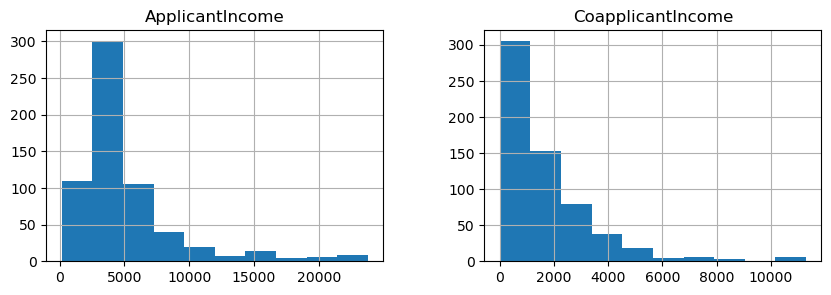

In [18]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(10,3))

- The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

## Missing values treatment
If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.
Missing values are treated for each column separately.

Here, missing values are treated using the following approach:
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables

In [19]:
# Finding how many missing values are there for each column
LoanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# Treating missing values for categorical variable with MODE value
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)

LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)

LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)

LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)

LoanData['Loan_Amount_Term'].fillna(LoanData['Loan_Amount_Term'].mode()[0], inplace=True)

LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)

In [21]:
# Treating missing values for continuous variable with Median value
LoanData['LoanAmount'].fillna(LoanData['LoanAmount'].median(), inplace=True)

In [22]:
# Checking missing values again after the treatment
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Selection
Now, it is time to select the best features (columns) that are correlated with the target variable. This can be done by measuring correlation values or using statistical tests like ANOVA and Chi-Square. Additionally, visualizing the relationship between the target variable and predictors helps in understanding the data better. Below are the techniques used for both visualizing relationships and statistically measuring their strength.

**Categorical Target Variable Vs Continuous Predictor**
- Box Plot - Visual exploration
- ANOVA test - Statistical measurement

**Categorical Target Variable Vs Categorical Predictor**
- Grouped Bar Plots - Visual exploration
- Chi-Square test - Statistical measurement

<b>Visual Relationship exploration: Categorical Vs Continuous -- Box Plots<b>

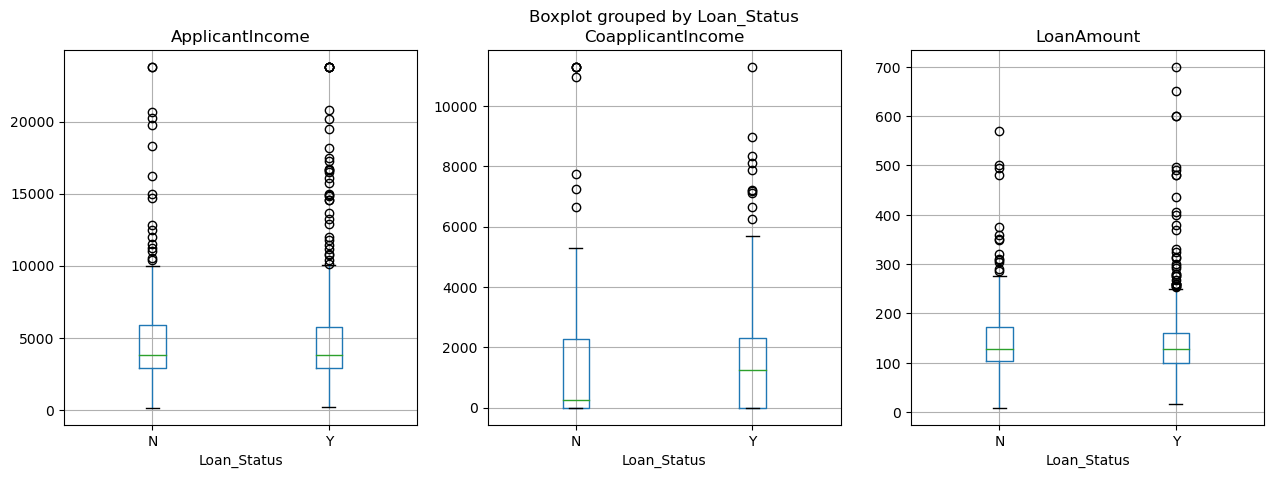

In [23]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(15,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    LoanData.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

**Box-Plots interpretation**

These plots show how a continuous predictor (Y-axis) is distributed across different categories (X-axis).

If the distributions look similar across categories (boxes align), it means the continuous variable has no effect on the target variable, so they are not correlated.

For example, in the "ApplicantIncome vs. Loan_Status" chart, the boxes are in the same line, meaning income is similar for both approved and rejected loans. So, 'ApplicantIncome' does not help distinguish loan approval.

The other two charts show the same pattern, confirming that all three continuous predictors are not correlated with the target variable.

This conclusion is further validated by the results of the ANOVA test below.

**Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [24]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=LoanData, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6651120750168427
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.41132365467797827


[]

- The results of ANOVA confirm our visual analysis using box plots above. All three columns are NOT correlated with Loan_Status.

<b>Visual Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts<b>

In [26]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=LoanData['Gender'], columns=LoanData['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


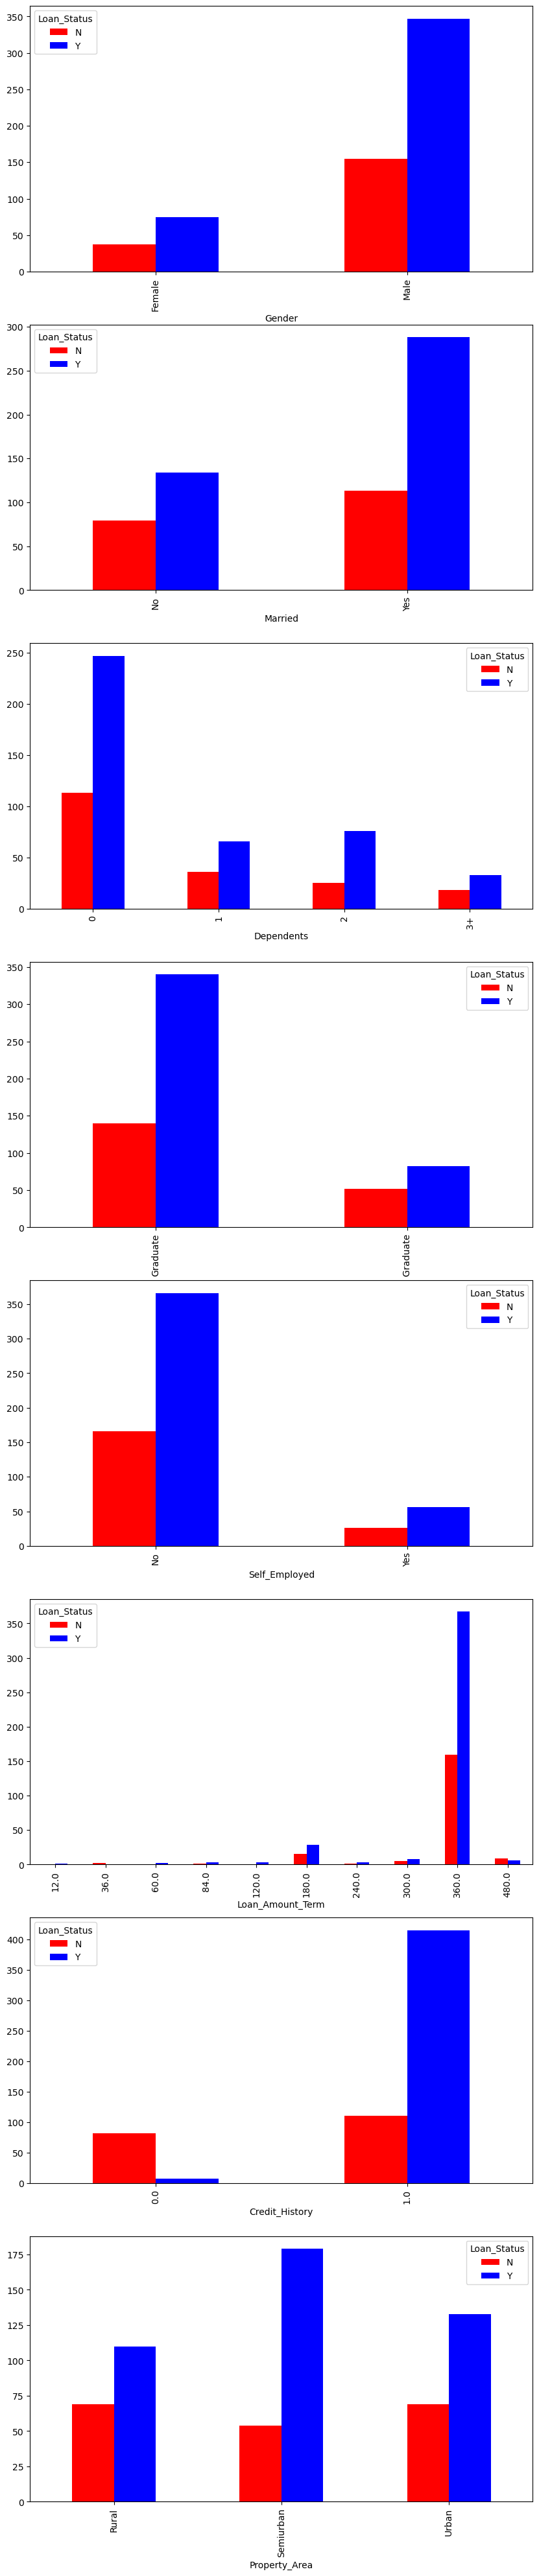

In [27]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=LoanData[CategoricalCol], columns=LoanData['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

**Grouped Bar charts Interpretation**

These grouped bar charts show frequency on the Y-axis and categories on the X-axis. If the bar ratios are similar across all categories, the two variables are not correlated.

For example, in the 'Gender vs. Loan_Status' plot, the approval-to-rejection ratio is similar for both males and females, indicating that gender does not impact loan approval. Hence, these variables are not correlated.

However, in the 'Credit_History vs. Loan_Status' plot, approvals are significantly higher when Credit_History = 1.0, showing that credit history affects loan approval. Therefore, these two variables are correlated.

This analysis is confirmed in the next section using Chi-Square tests.

**Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test**

Chi-Square test is conducted to check the correlation between two categorical variables

In [28]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [29]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=LoanData, 
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Loan_Status | P-Value: 1.0
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.13058516348934335
Credit_History is correlated with Loan_Status | P-Value: 3.4183499979091188e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

- Based on the Chi-Square test results, the following categorical columns are selected as predictors for machine learning:  'Married', 'Education', 'Credit_History', 'Property_Area'

## Selecting final predictors for Machine Learning

In [30]:
# Based on the above tests, selecting the final columns for machine learning
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=LoanData[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [31]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning

<b>Converting the binary nominal variable to numeric using 1/0 mapping<b>

In [32]:
# Converting the binary nominal variable to numeric using 1/0 mapping
DataForML["Married"].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


<b>Converting the nominal variable to numeric using get_dummies()<b>

In [33]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

In [34]:
# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=LoanData['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,0,0,1,Y
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y


## Machine Learning: Splitting the data into Training and Testing sample
The entire dataset is not used for model creation. A portion of the data is randomly set aside to evaluate the model's performance, known as testing data, while the remaining data, called training data, is used to build the model. Typically, 70% of the data is allocated for training, and 30% is used for testing.

In [35]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

**Separate Target Variable and Predictor Variables**

In [36]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values



<b>Standardization/Normalization of data<b>

In [37]:
#Sandardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
# PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

**Splitting the data into Training and Testing sample**

In [38]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [39]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


## Logistic Regression

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# choose from different tunable hyper parameters
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Creating predictions on Test data
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


## Decision Trees

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


<Axes: >

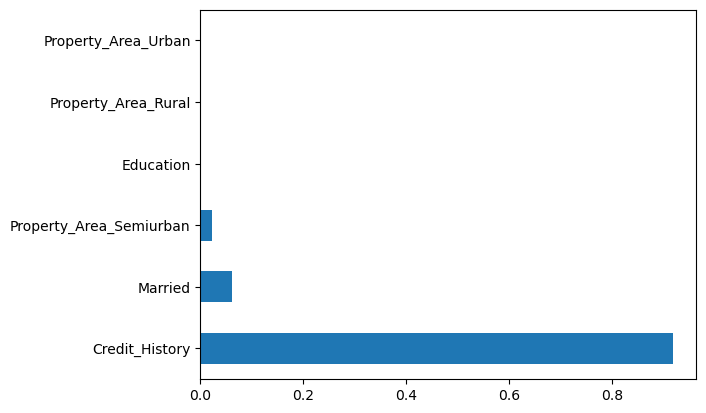

In [41]:
# Decision Trees
from sklearn import tree

# choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)

# Creating predictions on Test data
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Random Forest

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


<Axes: >

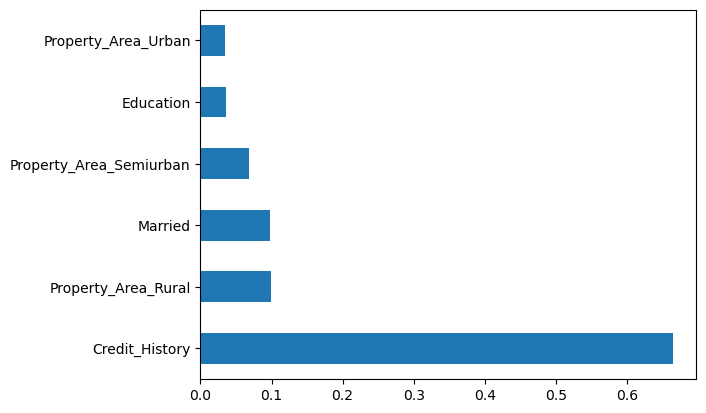

In [42]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier

# choose from different tunable hyper parameters
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)

# Creating predictions on Test data
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## AdaBoost

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


<Axes: >

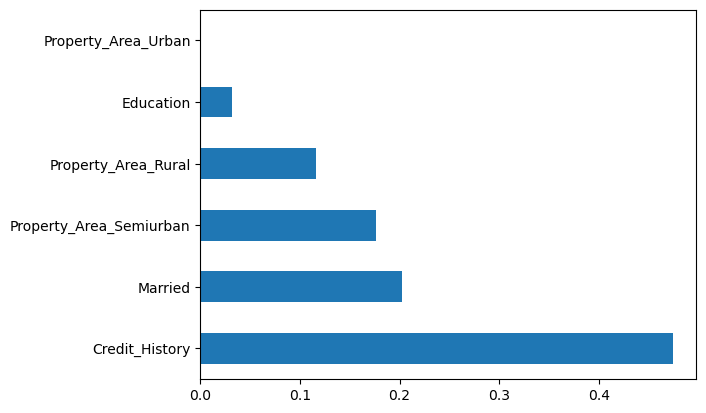

In [43]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)

# Creating predictions on Test data
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## KNN

In [44]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier

# choose from different tunable hyper parameters
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)

# Creating predictions on Test data
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.85      0.46      0.60        74
           Y       0.72      0.95      0.82       111

    accuracy                           0.75       185
   macro avg       0.79      0.70      0.71       185
weighted avg       0.77      0.75      0.73       185

[[ 34  40]
 [  6 105]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.51567852 0.61246434 0.50743155 0.51554611 0.49356873 0.52017245
 0.63642832 0.55498411 0.57326796 0.62098361]

Final Average Accuracy of the model: 0.56


## SVM

In [45]:
# Support Vector Machines(SVM)
from sklearn import svm

# choose from different tunable hyper parameters
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)

# Creating predictions on Test data
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


## Naive Bayes

In [46]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
# clf = MultinomialNB()

# Creating the model on Training Data
NB=clf.fit(X_train,y_train)

# Creating predictions on Test data
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


## Deployment of the Model

Based on the trials, the algorithm that achieves the best average accuracy is selected. In this case, multiple algorithms have produced similar average accuracy, allowing for flexibility in choosing any of them.

Adaboost is chosen as the final model due to its speed and effective use of predictors, as observed in its variable importance chart. It ensures that no single predictor dominates the decision, which is beneficial.

To deploy the model, the following steps are followed:
1.	Train the model using 100% of the available data.
2.	Save the model as a serialized file for storage and future use.
3.	Develop a Python function that integrates with front-end applications to take inputs and return predictions.


<b>Step 1. Retraining the model using 100% data<b>

In [47]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using the Adaboost algorithm with final hyperparamters
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Training the model on 100% Data available
FinalAdaboostModel=clf.fit(X,y)

<b>Step 2. Save the model as a serialized file which can be stored anywhere<b>

In [48]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
# print('pickle file of Predictive Model is saved at Location:',os.getcwd())

<b>Step 3. Create a python function<b>

In [49]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    # InputLoanDetails=InputLoanDetails.append(DataForML)
    InputLoanDetails = pd.concat([InputLoanDetails, DataForML], ignore_index=True)
    
    # Treating the binary nominal variables first
    InputLoanDetails['Married'].replace({'Yes':1, 'No':0}, inplace=True)
    InputLoanDetails['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]    
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

## Testing Model with Sample Data

In [50]:
# Calling the function for some loan applications
NewLoanApplications=pd.DataFrame(
data=[['No','Graduate',1,'Urban'],
     ['No','Graduate',0,'Urban']],
columns=['Married','Education','Credit_History','Property_Area'])

print(NewLoanApplications)

  Married Education  Credit_History Property_Area
0      No  Graduate               1         Urban
1      No  Graduate               0         Urban


In [51]:
# Calling the Function for prediction
PredictionResult=PredictLoanStatus(InputLoanDetails= NewLoanApplications)
PredictionResult

,Predicted Status
0,Y
1,N
